In [1]:
import os
os.chdir('..')
from visual import config
import requests
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
import geopandas as gpd
import numpy as np


In [2]:
path_vec_tibet = config.root_proj + '/data/tibet/tibet-plateau-boundary/TPBoundary_HF/TPBoundary_HF.gpkg'
geodf_vec_tibet = gpd.read_file(path_vec_tibet)


/home/yons/miniconda3/envs/venv-luo/lib/python3.6/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
# tibet_mpolygon = geodf_vec_tibet['geometry']
# tibet_mpolygon_wgs84 = tibet_mpolygon.to_crs({'init': 'epsg:4326'})
# # print(tibet_mpolygon.bounds)
# bounds = tibet_mpolygon_wgs84.bounds
# bounds


In [6]:
## configuration
# tibet_bounds = (73.50, 26.00, 104.42, 39.99)    # tibet
tibet_bounds = ([70, 23, 108, 42])



## **Download SRTM DEM**

In [11]:
## !!!! unable to download so big data by using requests api.
# !!!! so download fromt the web: https://portal.opentopography.org/raster?opentopoID=OTSRTM.042013.4326.1
demtype = "SRTMGL3"

### tile 1
url = "https://portal.opentopography.org/API/globaldem?demtype={}&west={}&south={}&east={}&north={}&outputFormat=GTiff".format(demtype, *tibet_bounds)
path_dem = config.root_proj + '/data/tibet/dem/' + 'tibet_{}_buf.tif'.format(demtype)
#  ----- download -----  ##
response = requests.get(url)
if not os.path.exists(path_dem):
    open(path_dem, 'wb').write(response.content)


In [8]:
import elevation


ModuleNotFoundError: No module named 'elevation'

### Check the downloaded data

In [8]:
path_dem


'/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/tibet/dem/tibet_SRTMGL3.tif'

In [9]:
dem_img,_ = readTiff(path_dem)



AttributeError: 'NoneType' object has no attribute 'RasterXSize'

In [49]:
# ## mosaic
# os.chdir(config.root_proj + '/data/tibet/dem')

# file_1 = 'output_SRTMGL3_1.tif'
# file_2 = 'output_SRTMGL3_2.tif'
# out_file = 'tibet_SRTMGL3.tif'
# !gdal_merge.py -init 0 -o $out_file $file_1 $file_2 


0...10...20...30...40...50...60...70...80...90...100 - done.


### Downsampling

In [3]:
## downsampling
path_srtm_down = config.root_proj +  '/data/tibet/dem/tibet_SRTMGL3_down.tif' 
!gdal_translate -outsize 10% 10% -r average $out_file $out_file_down


### Check downsampling

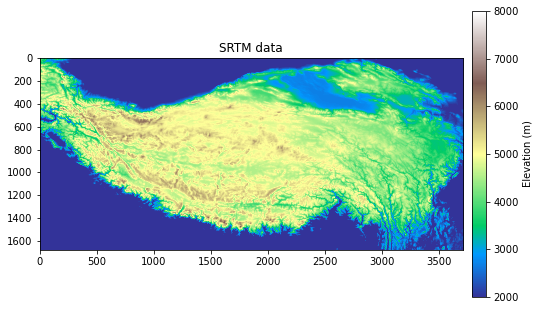

In [4]:
## check
srtm_down, srtm_down_info = readTiff(path_srtm_down)
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('downsampled SRTM data') 
plt.imshow(srtm_down, cmap=cmap, clim=[2000, 8000], alpha=1)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


### Mask with tibet boundary (.shp file)

In [19]:
path_shp =  config.root_proj + '/data/tibet/tibet-plateau-boundary/TPBoundary_HF/TPBoundary_HF_wgs84.shp'
path_srtm_down_mask = config.root_proj +  '/data/tibet/dem/tibet_SRTMGL3_down_mask.tif'
!gdalwarp -cutline $path_shp $path_srtm_down $path_srtm_down_mask



Processing /home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/tibet/dem/tibet_SRTMGL3_down.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


### Check

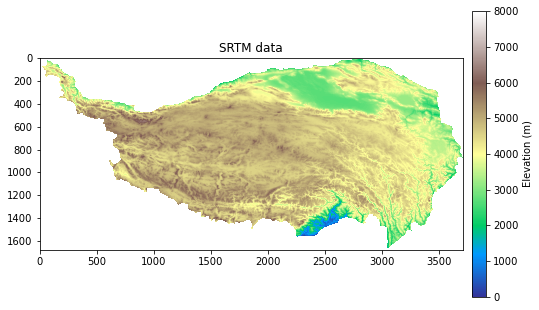

In [17]:
srtm_down_mask, srtm_down_mask_info = readTiff(path_srtm_down_mask)
srtm_down_mask = np.where(srtm_down_mask, srtm_down_mask, np.nan)
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('SRTM data') 
plt.imshow(srtm_down_mask, cmap=cmap, clim=[0, 8000], alpha=1)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


## **Image visualization**